In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [5]:
df_train = pd.read_csv(r'C:\Users\ayush\ML Finance\train.csv', index_col='ID')
df_train

C:\Users\ayush\AppData\Local\Temp\ipykernel_18536\2608154147.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(r'C:\Users\ayush\ML Finance\train.csv', index_col='ID')


Customer_ID     Month           Name   Age          SSN Occupation  \
ID                                                                           
0x1602    CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
0x1603    CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
0x1604    CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
0x1605    CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
0x1606    CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   
...             ...       ...            ...   ...          ...        ...   
0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   Mechanic   
0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   Mechanic   
0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   Mechanic   
0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   Mechanic   
0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   Mechanic   

        Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
ID                                                                
0x1602       19114.12            1824.843333                  3   
0x1603       19114.12                    NaN                  3   
0x1604       19114.12                    NaN                  3   
0x1605       19114.12                    NaN                  3   
0x1606       19114.12            1824.843333                  3   
...               ...                    ...                ...   
0x25fe9      39628.99            3359.415833                  4   
0x25fea      39628.99            3359.415833                  4   
0x25feb      39628.99            3359.415833                  4   
0x25fec      39628.99            3359.415833                  4   
0x25fed     39628.99_            3359.415833                  4   

         Num_Credit_Card  ...  Credit_Mix Outstanding_Debt  \
ID                        ...                                
0x1602                 4  ...           _           809.98   
0x1603                 4  ...        Good           809.98   
0x1604                 4  ...        Good           809.98   
0x1605                 4  ...        Good           809.98   
0x1606                 4  ...        Good           809.98   
...                  ...  ...         ...              ...   
0x25fe9                6  ...           _           502.38   
0x25fea                6  ...           _           502.38   
0x25feb                6  ...        Good           502.38   
0x25fec                6  ...        Good           502.38   
0x25fed                6  ...        Good           502.38   

        Credit_Utilization_Ratio      Credit_History_Age  \
ID                                                         
0x1602                 26.822620   22 Years and 1 Months   
0x1603                 31.944960                     NaN   
0x1604                 28.609352   22 Years and 3 Months   
0x1605                 31.377862   22 Years and 4 Months   
0x1606                 24.797347   22 Years and 5 Months   
...                          ...                     ...   
0x25fe9                34.663572   31 Years and 6 Months   
0x25fea                40.565631   31 Years and 7 Months   
0x25feb                41.255522   31 Years and 8 Months   
0x25fec                33.638208   31 Years and 9 Months   
0x25fed                34.192463  31 Years and 10 Months   

        Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
ID                                                                           
0x1602                     No           49.574949        80.41529543900253   
0x1603                     No           49.574949       118.28022162236736   
0x1604                     No           49.574949          81.699521264648   
0x1605                     No           49.574949        199.4580743910713   
0x1606                     No           49.574949       41.420153

In [6]:
df_test = pd.read_csv(r'C:\Users\ayush\ML Finance\test.csv', index_col='ID')
df_test

Customer_ID      Month             Name   Age          SSN Occupation  \
ID                                                                              
0x160a    CUS_0xd40  September    Aaron Maashoh    23  821-00-0265  Scientist   
0x160b    CUS_0xd40    October    Aaron Maashoh    24  821-00-0265  Scientist   
0x160c    CUS_0xd40   November    Aaron Maashoh    24  821-00-0265  Scientist   
0x160d    CUS_0xd40   December    Aaron Maashoh   24_  821-00-0265  Scientist   
0x1616   CUS_0x21b1  September  Rick Rothackerj    28  004-07-5839    _______   
...             ...        ...              ...   ...          ...        ...   
0x25fe5  CUS_0x8600   December   Sarah McBridec  4975  031-35-0942  Architect   
0x25fee  CUS_0x942c  September            Nicks    25  078-73-5990   Mechanic   
0x25fef  CUS_0x942c    October            Nicks    25  078-73-5990   Mechanic   
0x25ff0  CUS_0x942c   November            Nicks    25  078-73-5990   Mechanic   
0x25ff1  CUS_0x942c   December            Nicks    25  078-73-5990   Mechanic   

        Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
ID                                                                
0x160a       19114.12            1824.843333                  3   
0x160b       19114.12            1824.843333                  3   
0x160c       19114.12            1824.843333                  3   
0x160d       19114.12                    NaN                  3   
0x1616       34847.84            3037.986667                  2   
...               ...                    ...                ...   
0x25fe5      20002.88            1929.906667                 10   
0x25fee      39628.99                    NaN                  4   
0x25fef      39628.99            3359.415833                  4   
0x25ff0      39628.99                    NaN                  4   
0x25ff1      39628.99            3359.415833                  4   

         Num_Credit_Card  ...  Num_Credit_Inquiries Credit_Mix  \
ID                        ...                                    
0x160a                 4  ...                2022.0       Good   
0x160b                 4  ...                   4.0       Good   
0x160c                 4  ...                   4.0       Good   
0x160d                 4  ...                   4.0       Good   
0x1616                 4  ...                   5.0       Good   
...                  ...  ...                   ...        ...   
0x25fe5                8  ...                  12.0          _   
0x25fee                6  ...                   7.0       Good   
0x25fef                6  ...                   7.0       Good   
0x25ff0                6  ...                   7.0       Good   
0x25ff1                6  ...                   7.0          _   

        Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
ID                                                                           
0x160a            809.98                 35.030402   22 Years and 9 Months   
0x160b            809.98                 33.053114  22 Years and 10 Months   
0x160c            809.98                 33.811894                     NaN   
0x160d            809.98                 32.430559   23 Years and 0 Months   
0x1616            605.03                 25.926822   27 Years and 3 Months   
...                  ...                       ...                     ...   
0x25fe5           3571.7                 34.780553                     NaN   
0x25fee           502.38                 27.758522  31 Years and 11 Months   
0x25fef           502.38                 36.858542   32 Years and 0 Months   
0x25ff0           502.38                 39.139840   32 Years and 1 Months   
0x25ff1           502.38                 34.108530   32 Years and 2 Months   

        Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
ID                                                                           
0x160a                     No            49.574949  

In [7]:
print('Number of rows:{}'.format(df_train.shape[0]))
print('Number of columns:{}'.format(df_train.shape[1]))

Number of rows:100000
Number of columns:27


In [8]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  object 
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0x160a to 0x25ff1
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               50000 non-null  object 
 1   Month                     50000 non-null  object 
 2   Name                      44985 non-null  object 
 3   Age                       50000 non-null  object 
 4   SSN                       50000 non-null  object 
 5   Occupation                50000 non-null  object 
 6   Annual_Income             50000 non-null  object 
 7   Monthly_Inhand_Salary     42502 non-null  float64
 8   Num_Bank_Accounts         50000 non-null  int64  
 9   Num_Credit_Card           50000 non-null  int64  
 10  Interest_Rate             50000 non-null  int64  
 11  Num_of_Loan               50000 non-null  object 
 12  Type_of_Loan              44296 non-null  object 
 13  Delay_from_due_date       50000 non-null  int64  
 14  Num_

In [10]:
df_train.describe(include='all')

Customer_ID    Month    Name     Age        SSN Occupation  \
count       100000   100000   90015  100000     100000     100000   
unique       12500        8   10139    1788      12501         16   
top      CUS_0xd40  January  Langep      38  #F%$D@*&8    _______   
freq             8    12500      44    2833       5572       7062   
mean           NaN      NaN     NaN     NaN        NaN        NaN   
std            NaN      NaN     NaN     NaN        NaN        NaN   
min            NaN      NaN     NaN     NaN        NaN        NaN   
25%            NaN      NaN     NaN     NaN        NaN        NaN   
50%            NaN      NaN     NaN     NaN        NaN        NaN   
75%            NaN      NaN     NaN     NaN        NaN        NaN   
max            NaN      NaN     NaN     NaN        NaN        NaN   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count         100000           84998.000000      100000.000000   
unique         18940                    NaN                NaN   
top         36585.12                    NaN                NaN   
freq              16                    NaN                NaN   
mean             NaN            4194.170850          17.091280   
std              NaN            3183.686167         117.404834   
min              NaN             303.645417          -1.000000   
25%              NaN            1625.568229           3.000000   
50%              NaN            3093.745000           6.000000   
75%              NaN            5957.448333           7.000000   
max              NaN           15204.633333        1798.000000   

        Num_Credit_Card  ...  Credit_Mix Outstanding_Debt  \
count      100000.00000  ...      100000           100000   
unique              NaN  ...           4            13178   
top                 NaN  ...    Standard          1360.45   
freq                NaN  ...       36479               24   
mean           22.47443  ...         NaN              NaN   
std           129.05741  ...         NaN              NaN   
min             0.00000  ...         NaN              NaN   
25%             4.00000  ...         NaN              NaN   
50%             5.00000  ...         NaN              NaN   
75%             7.00000  ...         NaN              NaN   
max          1499.00000  ...         NaN              NaN   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
count             100000.000000                   90970                100000   
unique                      NaN                     404                     3   
top                         NaN  15 Years and 11 Months                   Yes   
freq                        NaN                     446                 52326   
mean                  32.285173                     NaN                   NaN   
std                    5.116875                     NaN                   NaN   
min                   20.000000                     NaN                   NaN   
25%                   28.052567                     NaN                   NaN   
50%                   32.305784                     NaN                   NaN   
75%                   36.496663                     NaN                   NaN   
max                   50.000000                     NaN                   NaN   

       Total_EMI_per_month  Amount_invested_monthly  \
count        100000.000000                    95521   
unique                 NaN                    91049   
top                    NaN                __10000__   
freq                   NaN                     4305   
mean           1403.118217                      NaN   
std            8306.041270                      NaN   
min               0.000000                      NaN   
25%              30.306660                      NaN   
50%              69.249473                      NaN   
75%             161.224249                      NaN   
max           82331.000000                      NaN   

                  

In [11]:
df_datatypes = pd.DataFrame(df_train.dtypes).reset_index().rename(columns={0:'Datatype', 'index' : 'Column Name'})

categorical_df = df_datatypes[df_datatypes['Datatype'] == 'object']
numerical_df = df_datatypes[df_datatypes['Datatype']!='object']

Numerical_Columns= list((numerical_df['Column Name']))
Categorical_Columns= list((categorical_df['Column Name']))

print(Numerical_Columns)
print(Categorical_Columns)

['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [12]:
df_train[list(numerical_df['Column Name'])].describe()


Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [13]:
df_train[list(categorical_df['Column Name'])].describe()

Customer_ID    Month    Name     Age        SSN Occupation  \
count       100000   100000   90015  100000     100000     100000   
unique       12500        8   10139    1788      12501         16   
top      CUS_0xd40  January  Langep      38  #F%$D@*&8    _______   
freq             8    12500      44    2833       5572       7062   

       Annual_Income Num_of_Loan   Type_of_Loan Num_of_Delayed_Payment  \
count         100000      100000          88592                  92998   
unique         18940         434           6260                    749   
top         36585.12           3  Not Specified                     19   
freq              16       14386           1408                   5327   

       Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
count                100000     100000           100000   
unique                 4384          4            13178   
top                       _   Standard          1360.45   
freq                   2091      36479               24   

            Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly  \
count                    90970                100000                   95521   
unique                     404                     3                   91049   
top     15 Years and 11 Months                   Yes               __10000__   
freq                       446                 52326                    4305   

                     Payment_Behaviour                   Monthly_Balance  \
count                           100000                             98800   
unique                               7                             98792   
top     Low_spent_Small_value_payments  __-333333333333333333333333333__   
freq                             25513                                 9   

       Credit_Score  
count        100000  
unique            3  
top        Standard  
freq          53174

In [14]:
#keeping df_train as the original we make a copy of it.
train_data=df_train

In [15]:
# Categorical Cols
categorical_cols = [c for c in train_data.columns if train_data[c].dtype == 'object']

In [16]:
#There are something like started and/or ended with "_" 
#or some other values lile !@# etc

for col in categorical_cols:
    train_data[col] = train_data[col].str.strip('_')

    try:
        train_data[col] = train_data[col].astype('float64')
    except:
        train_data[col] = train_data[col]
        

for col in categorical_cols:
    train_data[col] = train_data[col].replace({'':np.nan})

    try:
        train_data[col] = train_data[col].astype('float64')
    except:
        train_data[col] = train_data[col]

for col in categorical_cols:
    train_data[col] = train_data[col].replace({'!@9#%8':np.nan, '#F%$D@*&8':np.nan})

In [17]:
train_data[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              100000 non-null  object 
 1   Month                    100000 non-null  object 
 2   Name                     90015 non-null   object 
 3   Age                      100000 non-null  float64
 4   SSN                      94428 non-null   object 
 5   Occupation               92938 non-null   object 
 6   Annual_Income            100000 non-null  float64
 7   Num_of_Loan              100000 non-null  float64
 8   Type_of_Loan             88592 non-null   object 
 9   Num_of_Delayed_Payment   92998 non-null   float64
 10  Changed_Credit_Limit     97909 non-null   float64
 11  Credit_Mix               79805 non-null   object 
 12  Outstanding_Debt         100000 non-null  float64
 13  Credit_History_Age       90970 non-null   object 
 14  Pay

In [18]:
#We want "Credit history age" in YY years only
credit_age = []
for i in train_data['Credit_History_Age']:
    credit_age.append(str(i).split(' ')[0])
    
train_data['Credit_History_Age'] = credit_age

train_data['Credit_History_Age'] = train_data['Credit_History_Age'].replace({'nan':np.nan})
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].astype('float64')

In [19]:
#Handling the outliers in the data like improper age  

numerical_cols = [col for col in train_data.columns if (train_data[col].dtype == 'int64') | (train_data[col].dtype == 'float64')]

for x in list(numerical_cols):
    q75,q25 = np.percentile(train_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_data.loc[train_data[x] < min,x] = np.nan
    train_data.loc[train_data[x] > max,x] = np.nan

In [20]:
#We can drop the "Type of loan"column
train_data.drop(columns=['Type_of_Loan'], axis=1, inplace=True)

In [21]:
#Checking the missing data
train_data.isnull().sum()

Customer_ID                     0
Month                           0
Name                         9985
Age                          2781
SSN                          5572
Occupation                   7062
Annual_Income                2783
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1315
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  4348
Delay_from_due_date          4002
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt             5272
Credit_Utilization_Ratio        4
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month          6795
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

<AxesSubplot:>

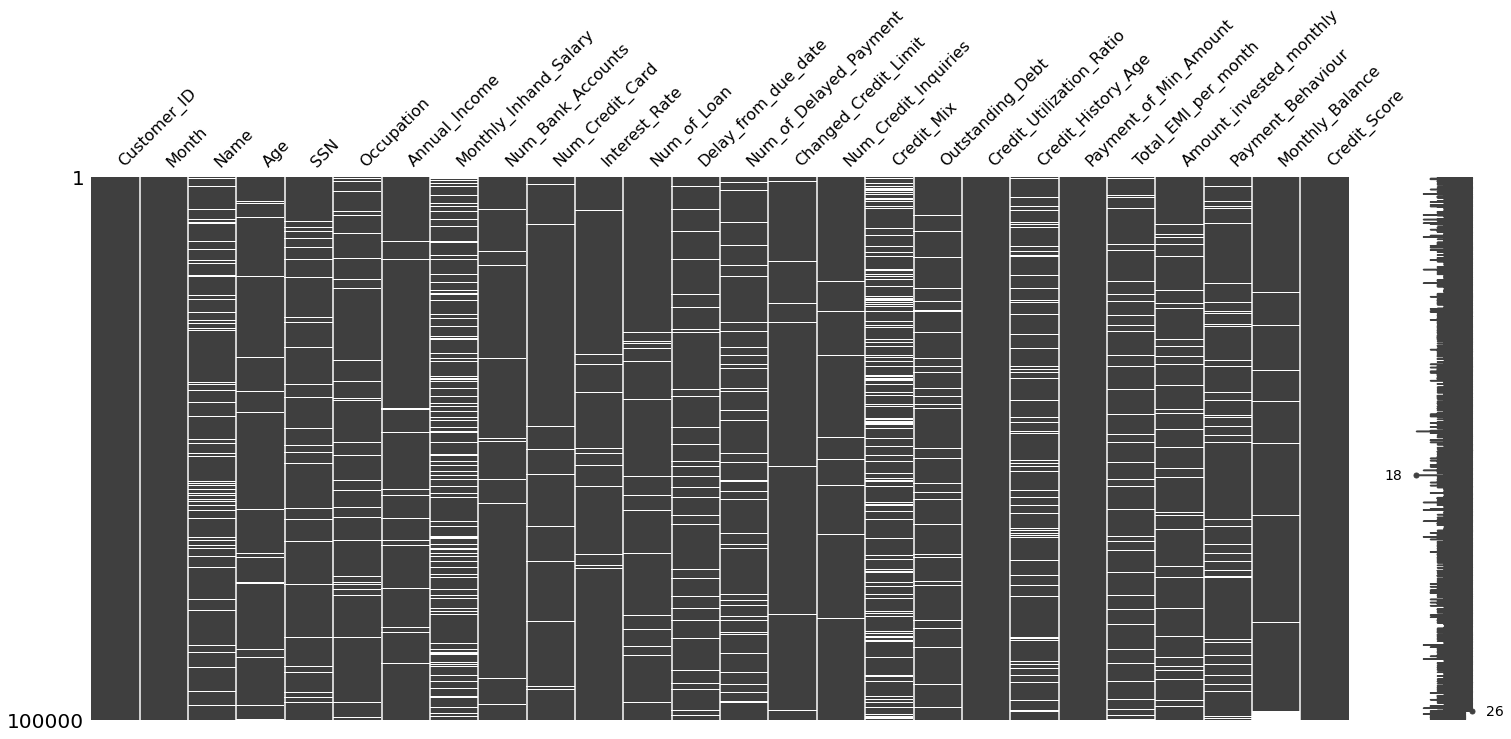

In [22]:
msno.matrix(train_data)

In [23]:
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing

Name                         9985
Age                          2781
SSN                          5572
Occupation                   7062
Annual_Income                2783
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1315
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  4348
Delay_from_due_date          4002
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt             5272
Credit_Utilization_Ratio        4
Credit_History_Age           9030
Total_EMI_per_month          6795
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
dtype: int64

In [24]:
missing_cols = [col for col in missing.index]
missing_cols.append('Customer_ID')
missing_cols

['Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Customer_ID']

In [25]:
#Going with the numerical missing columns first

missing_cols_set = set(missing_cols)
missing_cols_set

{'Age',
 'Amount_invested_monthly',
 'Annual_Income',
 'Changed_Credit_Limit',
 'Credit_History_Age',
 'Credit_Mix',
 'Credit_Utilization_Ratio',
 'Customer_ID',
 'Delay_from_due_date',
 'Interest_Rate',
 'Monthly_Balance',
 'Monthly_Inhand_Salary',
 'Name',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_Credit_Inquiries',
 'Num_of_Delayed_Payment',
 'Num_of_Loan',
 'Occupation',
 'Outstanding_Debt',
 'Payment_Behaviour',
 'SSN',
 'Total_EMI_per_month'}

In [26]:
# numerical cols with missing values
numerical_cols_set = {col for col in train_data.columns if (train_data[col].dtype=='int64') | (train_data[col].dtype=='float64')}
numerical_cols_missing = [col for col in numerical_cols_set.intersection(missing_cols_set)]
numerical_cols_missing.append('Customer_ID')
numerical_cols_missing

['Monthly_Inhand_Salary',
 'Credit_Utilization_Ratio',
 'Num_of_Loan',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Annual_Income',
 'Num_Credit_Card',
 'Changed_Credit_Limit',
 'Num_of_Delayed_Payment',
 'Delay_from_due_date',
 'Monthly_Balance',
 'Num_Credit_Inquiries',
 'Total_EMI_per_month',
 'Interest_Rate',
 'Num_Bank_Accounts',
 'Credit_History_Age',
 'Age',
 'Customer_ID']

In [27]:
train_data[numerical_cols_missing]

Monthly_Inhand_Salary  Credit_Utilization_Ratio  Num_of_Loan  \
ID                                                                      
0x1602             1824.843333                 26.822620          4.0   
0x1603                     NaN                 31.944960          4.0   
0x1604                     NaN                 28.609352          4.0   
0x1605                     NaN                 31.377862          4.0   
0x1606             1824.843333                 24.797347          4.0   
...                        ...                       ...          ...   
0x25fe9            3359.415833                 34.663572          2.0   
0x25fea            3359.415833                 40.565631          2.0   
0x25feb            3359.415833                 41.255522          2.0   
0x25fec            3359.415833                 33.638208          2.0   
0x25fed            3359.415833                 34.192463          2.0   

         Outstanding_Debt  Amount_invested_monthly  Annual_Income  \
ID                                                                  
0x1602             809.98                80.415295       19114.12   
0x1603             809.98               118.280222       19114.12   
0x1604             809.98                81.699521       19114.12   
0x1605             809.98               199.458074       19114.12   
0x1606             809.98                41.420153       19114.12   
...                   ...                      ...            ...   
0x25fe9            502.38                60.971333       39628.99   
0x25fea            502.38                54.185950       39628.99   
0x25feb            502.38                24.028477       39628.99   
0x25fec            502.38               251.672582       39628.99   
0x25fed            502.38               167.163865       39628.99   

         Num_Credit_Card  Changed_Credit_Limit  Num_of_Delayed_Payment  \
ID                                                                       
0x1602               4.0                 11.27                     7.0   
0x1603               4.0                 11.27                     NaN   
0x1604               4.0                   NaN                     7.0   
0x1605               4.0                  6.27                     4.0   
0x1606               4.0                 11.27                     NaN   
...                  ...                   ...                     ...   
0x25fe9              6.0                 11.50                     7.0   
0x25fea              6.0                 11.50                     7.0   
0x25feb              6.0                 11.50                     6.0   
0x25fec              6.0                 11.50                     NaN   
0x25fed              6.0                 11.50                     6.0   

         Delay_from_due_date  Monthly_Balance  Num_Credit_Inquiries  \
ID                                                                    
0x1602                   3.0       312.494089                   4.0   
0x1603                  -1.0       284.629162                   4.0   
0x1604                   3.0       331.209863                   4.0   
0x1605                   5.0       223.451310                   4.0   
0x1606                   6.0       341.489231                   4.0   
...                      ...              ...                   ...   
0x25fe9                 23.0              NaN                   3.0   
0x25fea                 18.0              NaN                   3.0   
0x25feb                 27.0              NaN                   3.0   
0x25fec                 20.0              NaN                   3.0   
0x25fed                 18.0              NaN                   3.0   

         Total_EMI_per_month  Interest_Rate  Num_Bank_Accounts  \
ID                                                               
0x1602             49.574949            3.0                3.0   
0x1603             49.574949            3.0                3.0   
0x1604    

In [28]:
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing

Name                         9985
Age                          2781
SSN                          5572
Occupation                   7062
Annual_Income                2783
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1315
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  4348
Delay_from_due_date          4002
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt             5272
Credit_Utilization_Ratio        4
Credit_History_Age           9030
Total_EMI_per_month          6795
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
dtype: int64

In [29]:
#We observe that some of the column values are dependent
#on the "Customer ID"

#So we assign the values in missing coulmns by using average
#based on their "Customer Id" and bfill the rest of the columns.

numerical_cols_missing.pop()

'Customer_ID'

In [30]:
train_data.Customer_ID.value_counts()
train_data.Customer_ID.value_counts().value_counts()

#Thus observe that every Custome_ID has 8 values and there are a total of 12500 values of Customer_ID

8    12500
Name: Customer_ID, dtype: int64

In [31]:
based_customer_ID = [col for col in numerical_cols if train_data[col].head(8).nunique() == 1]
non_based_customer_ID = [col for col in numerical_cols if train_data[col].head(8).nunique() != 1]

In [32]:
based_customer_ID, non_based_customer_ID

(['Age',
  'Annual_Income',
  'Monthly_Inhand_Salary',
  'Num_Bank_Accounts',
  'Num_Credit_Card',
  'Interest_Rate',
  'Num_of_Loan',
  'Num_Credit_Inquiries',
  'Outstanding_Debt',
  'Credit_History_Age',
  'Total_EMI_per_month'],
 ['Delay_from_due_date',
  'Num_of_Delayed_Payment',
  'Changed_Credit_Limit',
  'Credit_Utilization_Ratio',
  'Amount_invested_monthly',
  'Monthly_Balance'])

In [33]:
train_data[based_customer_ID] = train_data.groupby(by=['Customer_ID'])[based_customer_ID].transform('median')
train_data[non_based_customer_ID] = train_data[non_based_customer_ID].fillna(method='bfill')

In [34]:
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing

Name                    9985
SSN                     5572
Occupation              7062
Annual_Income           1800
Credit_Mix             20195
Outstanding_Debt        5272
Total_EMI_per_month     2376
Payment_Behaviour       7600
Monthly_Balance         1696
dtype: int64

In [35]:
missing_cols_set = {col for col in missing.index}

In [36]:
missing_cols_set

{'Annual_Income',
 'Credit_Mix',
 'Monthly_Balance',
 'Name',
 'Occupation',
 'Outstanding_Debt',
 'Payment_Behaviour',
 'SSN',
 'Total_EMI_per_month'}

In [37]:
#categorical columns with missing values
categorical_cols_set = {col for col in train_data.columns if train_data[col].dtype == 'object'}
categorical_cols_set

{'Credit_Mix',
 'Credit_Score',
 'Customer_ID',
 'Month',
 'Name',
 'Occupation',
 'Payment_Behaviour',
 'Payment_of_Min_Amount',
 'SSN'}

In [38]:
categorical_cols_missing = [col for col in categorical_cols_set.intersection(missing_cols_set)]
categorical_cols_missing

['Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Name', 'SSN']

In [39]:
train_data[categorical_cols_missing] = train_data[categorical_cols_missing].fillna(method='bfill')

In [40]:
train_data.dropna(inplace=True)
train_data.drop(columns=['Customer_ID', 'SSN', 'Name'], axis=1, inplace=True)



#We thus finish handling the missing values

In [41]:
#Now we start with encoding the target Catergorical and Month Column

train_data['Credit_Score'] = train_data['Credit_Score'].map({'Poor':1, 'Standard':2, 'Good':3})

train_data


Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
ID                                                                         
0x1602    January  23.0  Scientist       19114.12            1824.843333   
0x1603   February  23.0  Scientist       19114.12            1824.843333   
0x1604      March  23.0  Scientist       19114.12            1824.843333   
0x1605      April  23.0  Scientist       19114.12            1824.843333   
0x1606        May  23.0  Scientist       19114.12            1824.843333   
...           ...   ...        ...            ...                    ...   
0x255f9     April  38.0     Lawyer       41015.55            3152.962500   
0x255fa       May  38.0     Lawyer       41015.55            3152.962500   
0x255fb      June  38.0     Lawyer       41015.55            3152.962500   
0x255fc      July  38.0     Lawyer       41015.55            3152.962500   
0x255fd    August  38.0     Lawyer       41015.55            3152.962500   

         Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
ID                                                                        
0x1602                 3.0              4.0            3.0          4.0   
0x1603                 3.0              4.0            3.0          4.0   
0x1604                 3.0              4.0            3.0          4.0   
0x1605                 3.0              4.0            3.0          4.0   
0x1606                 3.0              4.0            3.0          4.0   
...                    ...              ...            ...          ...   
0x255f9                0.0              4.0            4.0          1.0   
0x255fa                0.0              4.0            4.0          1.0   
0x255fb                0.0              4.0            4.0          1.0   
0x255fc                0.0              4.0            4.0          1.0   
0x255fd                0.0              4.0            4.0          1.0   

         Delay_from_due_date  ...  Credit_Mix  Outstanding_Debt  \
ID                            ...                                 
0x1602                   3.0  ...        Good            809.98   
0x1603                  -1.0  ...        Good            809.98   
0x1604                   3.0  ...        Good            809.98   
0x1605                   5.0  ...        Good            809.98   
0x1606                   6.0  ...        Good            809.98   
...                      ...  ...         ...               ...   
0x255f9                  9.0  ...        Good            599.40   
0x255fa                  9.0  ...        Good            599.40   
0x255fb                  9.0  ...        Good            599.40   
0x255fc                  9.0  ...        Good            599.40   
0x255fd                  9.0  ...        Good            599.40   

         Credit_Utilization_Ratio Credit_History_Age  Payment_of_Min_Amount  \
ID                                                                            
0x1602                  26.822620               22.0                     No   
0x1603                  31.944960               22.0                     No   
0x1604                  28.609352               22.0                     No   
0x1605                  31.377862               22.0                     No   
0x1606                  24.797347               22.0                     No   
...                           ...                ...                    ...   
0x255f9                 31.936092               25.0                     NM   
0x255fa                 26.268474               25.0                     No   
0x255fb                 28.754729               25.0                     No   
0x255fc                 38.514974               25.0                     No   
0x255fd                 31.356267               25.0                     No   

         Total_EMI_per_month  Amount_invested_monthly  \
ID                                                      
0x1602             49.574949     

In [42]:
clean_train_data = train_data.copy()

In [43]:
# Encode month manually

clean_train_data['Month'] = clean_train_data['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [44]:
y = clean_train_data['Credit_Score']
X = clean_train_data.drop(columns=['Credit_Score'], axis=1)

In [45]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
categorical_cols

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [46]:
low_cardinality_categorical_cols = [col for col in X.columns if 
                                    (X[col].dtype == 'object') & 
                                    (X[col].nunique()<4)]
low_cardinality_categorical_cols

['Credit_Mix', 'Payment_of_Min_Amount']

In [47]:
high_cardinality_categorical_cols = [col for col in X.columns if 
                                    (X[col].dtype == 'object') & 
                                    (X[col].nunique()>3)]

high_cardinality_categorical_cols

['Occupation', 'Payment_Behaviour']

In [48]:
OH_X = pd.get_dummies(X[low_cardinality_categorical_cols])
OH_X

Credit_Mix_Bad  Credit_Mix_Good  Credit_Mix_Standard  \
ID                                                              
0x1602                0                1                    0   
0x1603                0                1                    0   
0x1604                0                1                    0   
0x1605                0                1                    0   
0x1606                0                1                    0   
...                 ...              ...                  ...   
0x255f9               0                1                    0   
0x255fa               0                1                    0   
0x255fb               0                1                    0   
0x255fc               0                1                    0   
0x255fd               0                1                    0   

         Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  \
ID                                                            
0x1602                          0                         1   
0x1603                          0                         1   
0x1604                          0                         1   
0x1605                          0                         1   
0x1606                          0                         1   
...                           ...                       ...   
0x255f9                         1                         0   
0x255fa                         0                         1   
0x255fb                         0                         1   
0x255fc                         0                         1   
0x255fd                         0                         1   

         Payment_of_Min_Amount_Yes  
ID                                  
0x1602                           0  
0x1603                           0  
0x1604                           0  
0x1605                           0  
0x1606                           0  
...                            ...  
0x255f9                          0  
0x255fa                          0  
0x255fb                          0  
0x255fc                          0  
0x255fd                          0  

[89616 rows x 6 columns]

In [49]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

In [50]:
ord_encoder = OrdinalEncoder()
ORD_X = pd.DataFrame(ord_encoder.fit_transform(X[high_cardinality_categorical_cols]), index=X[high_cardinality_categorical_cols].index, columns=X[high_cardinality_categorical_cols].columns)
ORD_X

Occupation  Payment_Behaviour
ID                                    
0x1602         12.0                2.0
0x1603         12.0                3.0
0x1604         12.0                4.0
0x1605         12.0                5.0
0x1606         12.0                1.0
...             ...                ...
0x255f9         7.0                5.0
0x255fa         7.0                0.0
0x255fb         7.0                1.0
0x255fc         7.0                2.0
0x255fd         7.0                5.0

[89616 rows x 2 columns]

In [51]:
categorical_X = ORD_X.join(OH_X)

In [52]:
# Numerical Cols
numerical_cols = [col for col in X.columns if 
                 (X[col].dtype == 'float64')|
                 (X[col].dtype == 'int64')]

In [53]:
numerical_X = X[numerical_cols]



In [54]:
# Using MinMaxScaler for numerical data

cols_for_scaled = ['Annual_Income', 
                   'Monthly_Inhand_Salary', 
                   'Outstanding_Debt', 
                   'Credit_Utilization_Ratio', 
                   'Credit_History_Age', 
                   'Total_EMI_per_month', 
                   'Amount_invested_monthly',
                   'Monthly_Balance']

scaler = MinMaxScaler()
numerical_scaled_X = pd.DataFrame(scaler.fit_transform(numerical_X[cols_for_scaled]), 
                                  index=numerical_X[cols_for_scaled].index, 
                                  columns=numerical_X[cols_for_scaled].columns)

In [55]:
numerical_X[cols_for_scaled] = numerical_scaled_X

numerical_X.head()

C:\Users\ayush\AppData\Local\Temp\ipykernel_18536\2741363276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_X[cols_for_scaled] = numerical_scaled_X


Month   Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
ID                                                                             
0x1602      1  23.0       0.083178               0.120751                3.0   
0x1603      2  23.0       0.083178               0.120751                3.0   
0x1604      3  23.0       0.083178               0.120751                3.0   
0x1605      4  23.0       0.083178               0.120751                3.0   
0x1606      5  23.0       0.083178               0.120751                3.0   

        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
ID                                                                         
0x1602              4.0            3.0          4.0                  3.0   
0x1603              4.0            3.0          4.0                 -1.0   
0x1604              4.0            3.0          4.0                  3.0   
0x1605              4.0            3.0          4.0                  5.0   
0x1606              4.0            3.0          4.0                  6.0   

        Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
ID                                                                           
0x1602                     7.0                 11.27                   4.0   
0x1603                     7.0                 11.27                   4.0   
0x1604                     7.0                  6.27                   4.0   
0x1605                     4.0                  6.27                   4.0   
0x1606                     4.0                 11.27                   4.0   

        Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
ID                                                                       
0x1602          0.201725                  0.244206            0.666667   
0x1603          0.201725                  0.427553            0.666667   
0x1604          0.201725                  0.308159            0.666667   
0x1605          0.201725                  0.407254            0.666667   
0x1606          0.201725                  0.171714            0.666667   

        Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
ID                                                                     
0x1602             0.138708                 0.008042              1.0  
0x1603             0.138708                 0.011828              1.0  
0x1604             0.138708                 0.008170              1.0  
0x1605             0.138708                 0.019946              1.0  
0x1606             0.138708                 0.004142              1.0

In [56]:
Final_X = numerical_X.join(categorical_X)

In [57]:
Final_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89616 entries, 0x1602 to 0x255fd
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      89616 non-null  int64  
 1   Age                        89616 non-null  float64
 2   Annual_Income              89616 non-null  float64
 3   Monthly_Inhand_Salary      89616 non-null  float64
 4   Num_Bank_Accounts          89616 non-null  float64
 5   Num_Credit_Card            89616 non-null  float64
 6   Interest_Rate              89616 non-null  float64
 7   Num_of_Loan                89616 non-null  float64
 8   Delay_from_due_date        89616 non-null  float64
 9   Num_of_Delayed_Payment     89616 non-null  float64
 10  Changed_Credit_Limit       89616 non-null  float64
 11  Num_Credit_Inquiries       89616 non-null  float64
 12  Outstanding_Debt           89616 non-null  float64
 13  Credit_Utilization_Ratio   89616 non-null  f

In [58]:
y.info() #target colmn

<class 'pandas.core.series.Series'>
Index: 89616 entries, 0x1602 to 0x255fd
Series name: Credit_Score
Non-Null Count  Dtype
--------------  -----
89616 non-null  int64
dtypes: int64(1)
memory usage: 3.4+ MB


In [59]:
Final_cleaned_data =  Final_X.join(y)

In [60]:
Final_cleaned_data #with Target Variable

Month   Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
ID                                                                              
0x1602       1  23.0       0.083178               0.120751                3.0   
0x1603       2  23.0       0.083178               0.120751                3.0   
0x1604       3  23.0       0.083178               0.120751                3.0   
0x1605       4  23.0       0.083178               0.120751                3.0   
0x1606       5  23.0       0.083178               0.120751                3.0   
...        ...   ...            ...                    ...                ...   
0x255f9      4  38.0       0.233633               0.226176                0.0   
0x255fa      5  38.0       0.233633               0.226176                0.0   
0x255fb      6  38.0       0.233633               0.226176                0.0   
0x255fc      7  38.0       0.233633               0.226176                0.0   
0x255fd      8  38.0       0.233633               0.226176                0.0   

         Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
ID                                                                          
0x1602               4.0            3.0          4.0                  3.0   
0x1603               4.0            3.0          4.0                 -1.0   
0x1604               4.0            3.0          4.0                  3.0   
0x1605               4.0            3.0          4.0                  5.0   
0x1606               4.0            3.0          4.0                  6.0   
...                  ...            ...          ...                  ...   
0x255f9              4.0            4.0          1.0                  9.0   
0x255fa              4.0            4.0          1.0                  9.0   
0x255fb              4.0            4.0          1.0                  9.0   
0x255fc              4.0            4.0          1.0                  9.0   
0x255fd              4.0            4.0          1.0                  9.0   

         Num_of_Delayed_Payment  ...  Monthly_Balance  Occupation  \
ID                               ...                                
0x1602                      7.0  ...              1.0        12.0   
0x1603                      7.0  ...              1.0        12.0   
0x1604                      7.0  ...              1.0        12.0   
0x1605                      4.0  ...              1.0        12.0   
0x1606                      4.0  ...              1.0        12.0   
...                         ...  ...              ...         ...   
0x255f9                     1.0  ...              1.0         7.0   
0x255fa                     1.0  ...              1.0         7.0   
0x255fb                     1.0  ...              1.0         7.0   
0x255fc                     3.0  ...              1.0         7.0   
0x255fd                     2.0  ...              1.0         7.0   

         Payment_Behaviour  Credit_Mix_Bad  Credit_Mix_Good  \
ID                                                            
0x1602                 2.0               0                1   
0x1603                 3.0               0                1   
0x1604                 4.0               0                1   
0x1605                 5.0               0                1   
0x1606                 1.0               0                1   
...                    ...             ...              ...   
0x255f9                5.0               0                1   
0x255fa                0.0               0                1   
0x255fb                1.0               0                1   
0x255fc                2.0               0                1   
0x255fd                5.0               0                1   

         Credit_Mix_Standard  Payment_of_Min_Amount_NM  \
ID                                                       
0x1602                     0                         0   
0x1603                     0                         0   
0x1

In [59]:
df = Final_cleaned_data

In [60]:
percent_defaults= df.Credit_Score.value_counts() / len(df) *100
percent_defaults

2    53.535083
1    28.208132
3    18.256785
Name: Credit_Score, dtype: float64

([<matplotlib.patches.Wedge at 0x28921edb610>,
 [Text(-0.12191282862717685, 1.0932233359273487, ''),
  Text(-0.49080136855204876, -0.9844358875149951, ''),
  Text(0.9239757568707029, -0.5968825686139712, '')],
 [Text(-0.06649790652391464, 0.5963036377785538, '53.5%'),
  Text(-0.2677098373920266, -0.5369650295536337, '28.2%'),
  Text(0.5039867764749287, -0.32557231015307514, '18.3%')])

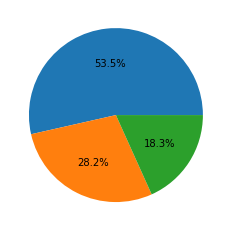

In [61]:
plt.pie(percent_defaults, autopct='%1.1f%%')

C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

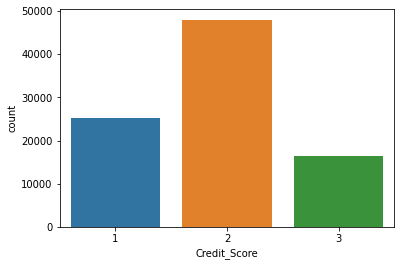

In [62]:
sns.countplot(df.Credit_Score)

<AxesSubplot:>

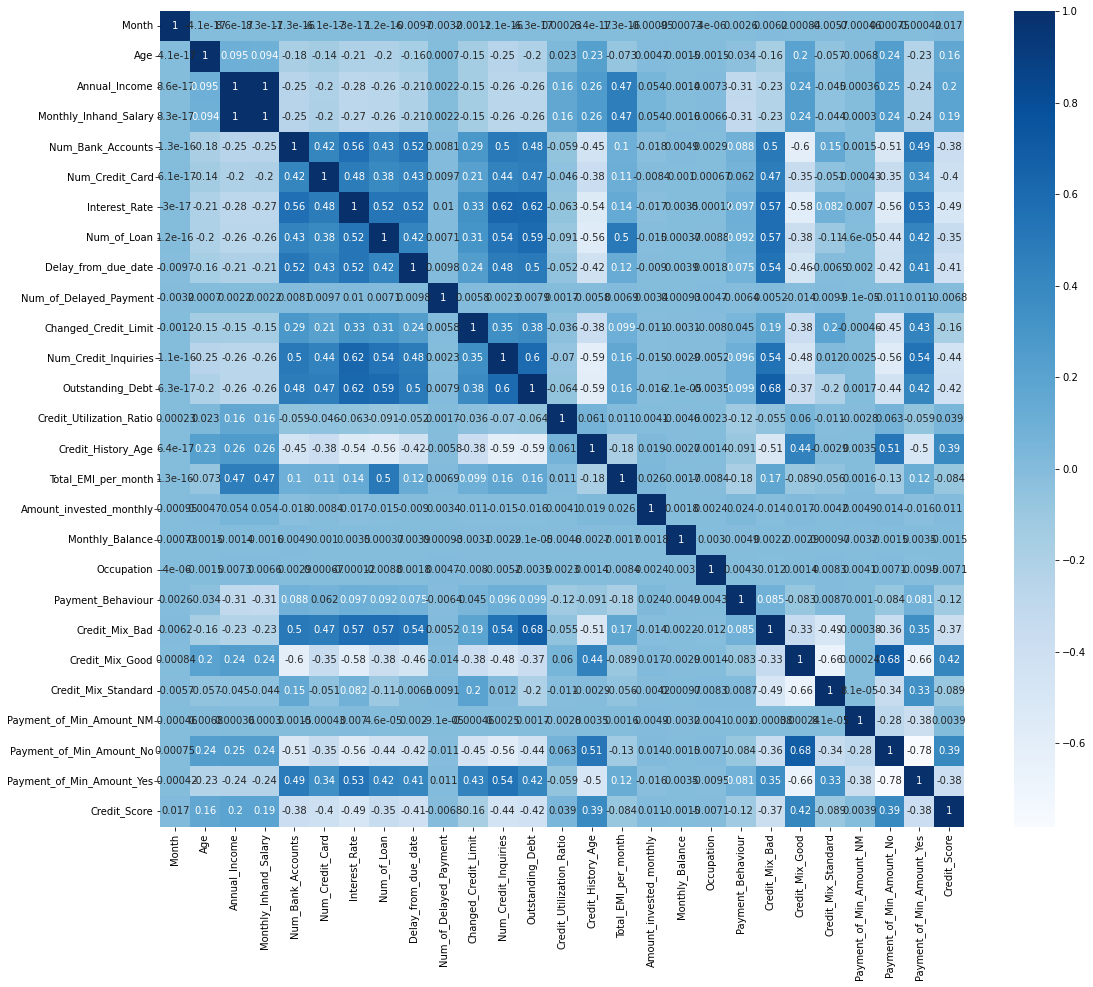

In [345]:
plt.subplots(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

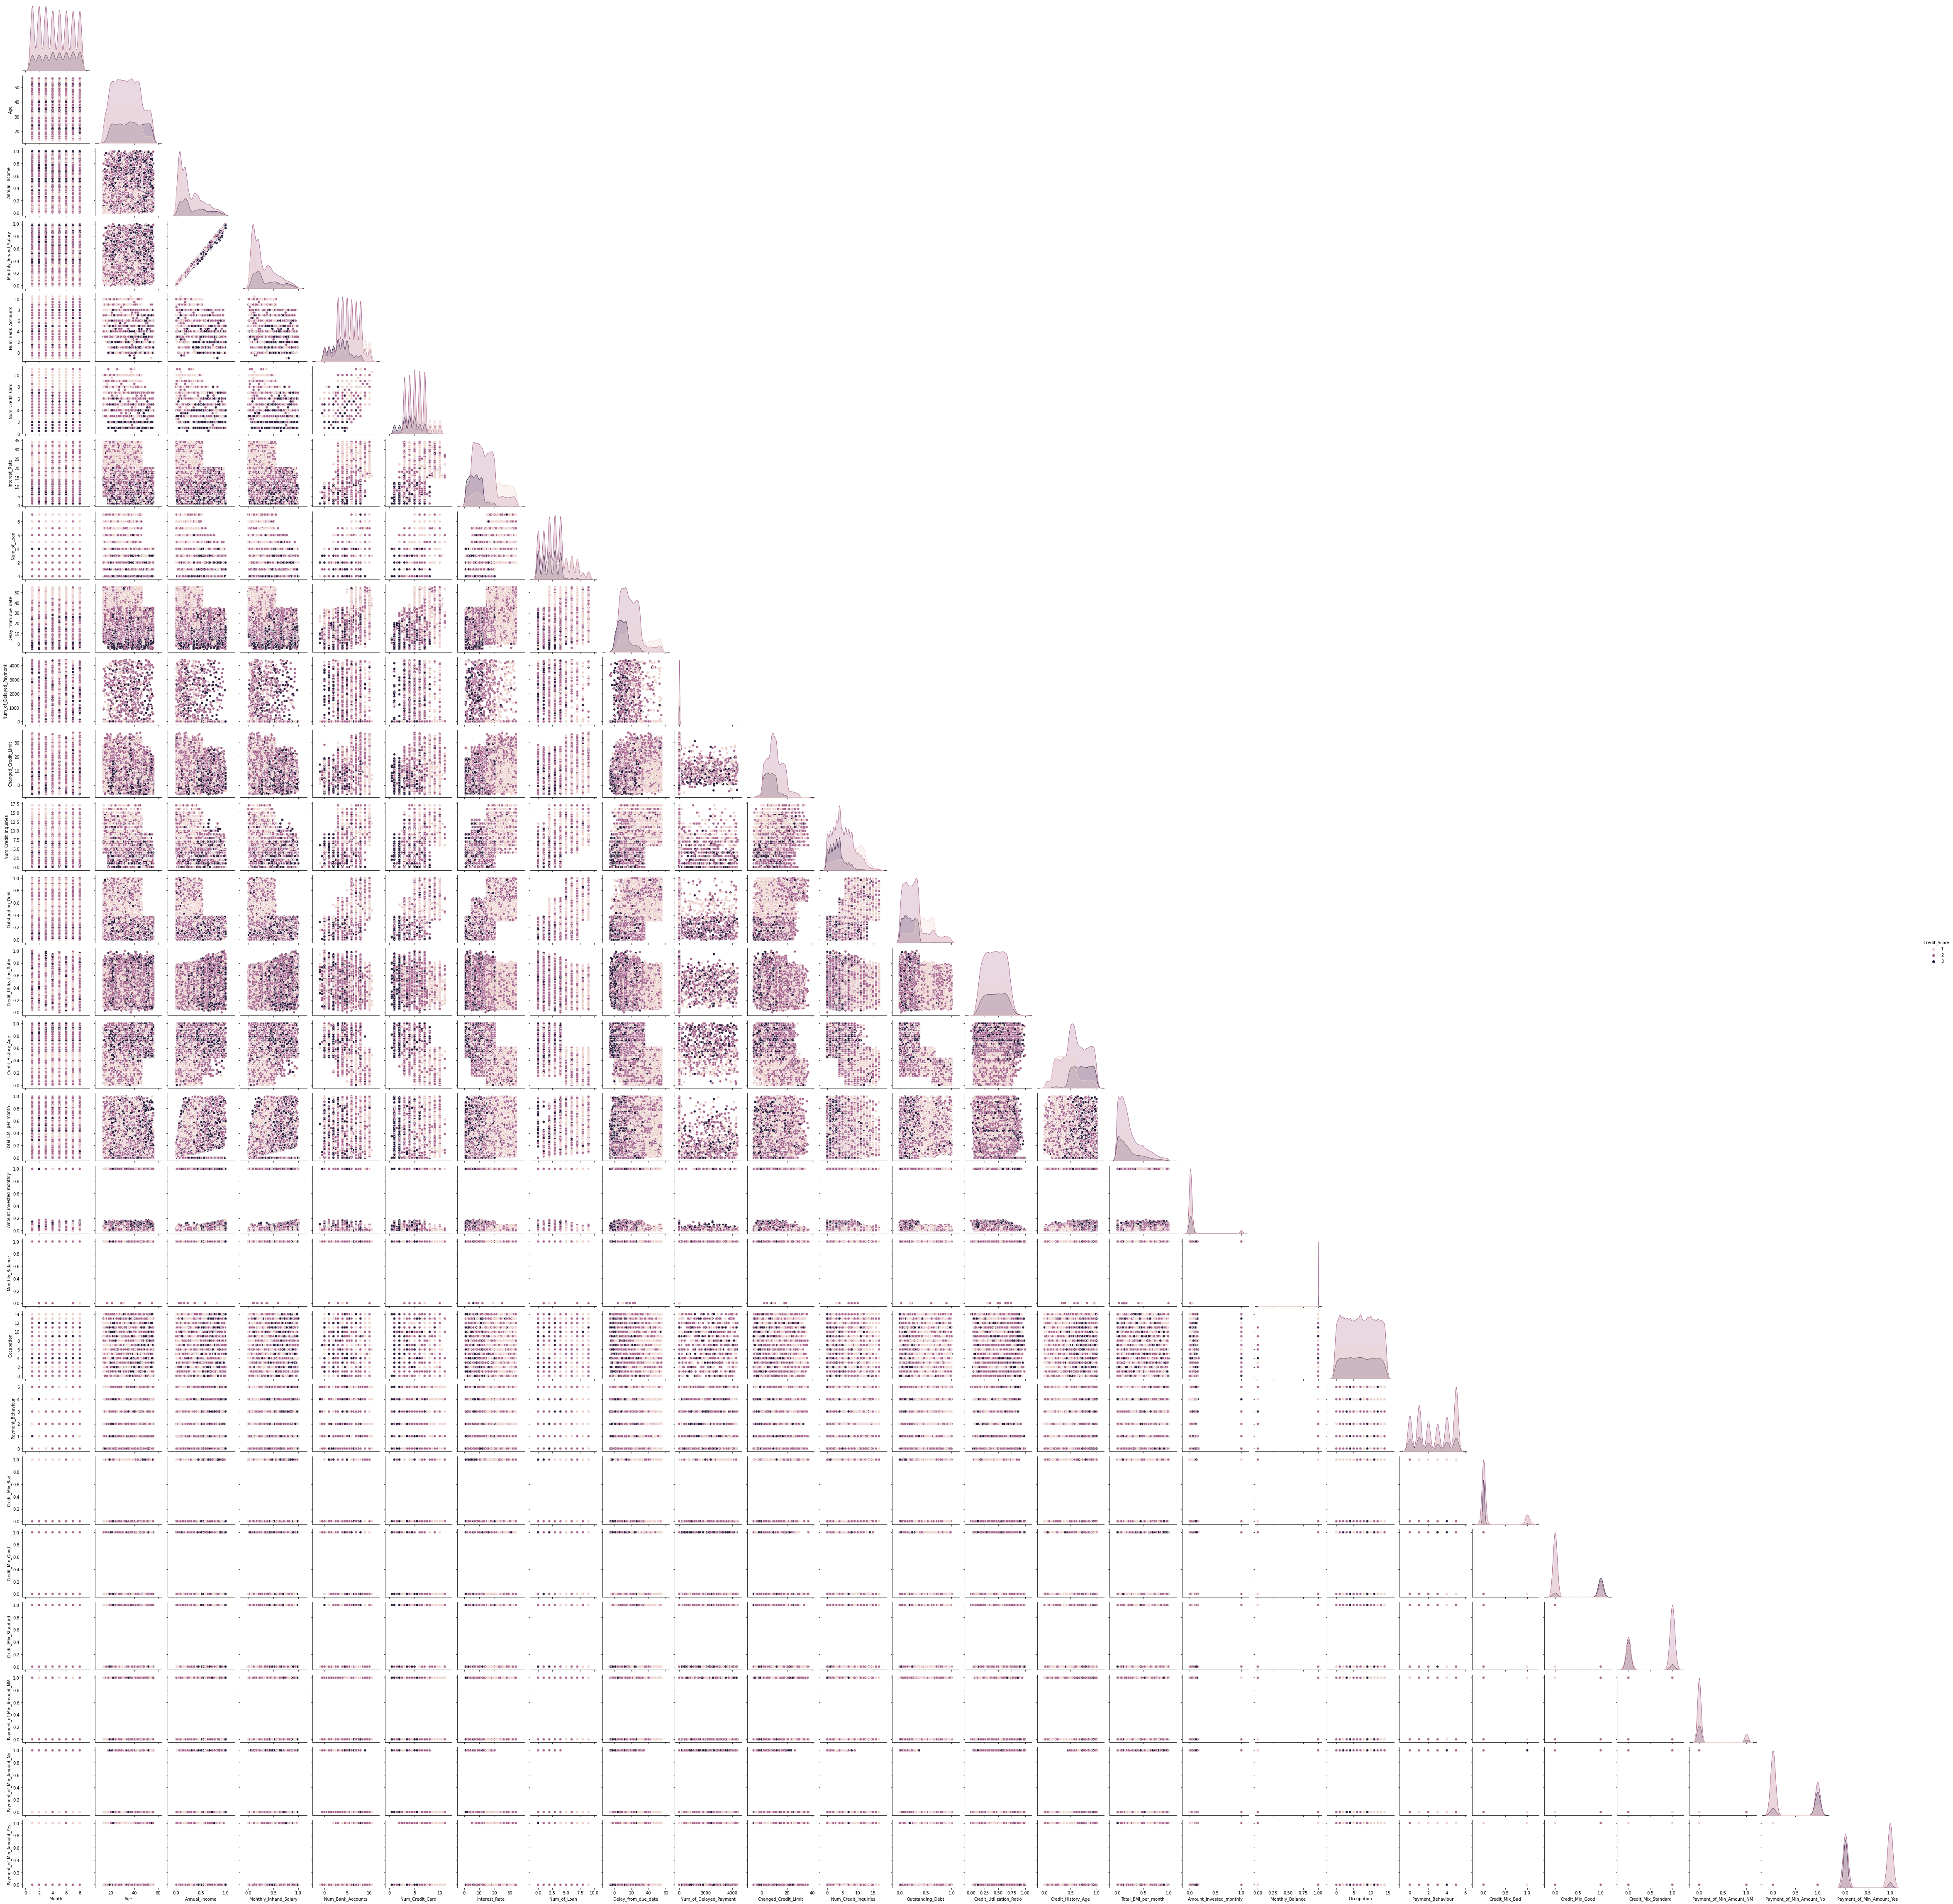

In [346]:
sns.pairplot(df, hue='Credit_Score', corner= True)

In [61]:
# Now we implement a Random Forest Classfifier on the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Final_X, y, test_size =0.2, random_state=42)

In [62]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=19)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=19)

In [63]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model1.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model1.predict(X_test)))

Training accuracy... 0.8919823690230431
Test accuracy 0.740403927694711


In [67]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1, n_estimators=500, max_depth=15, n_jobs=-1)

forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=500, n_jobs=-1,
                       random_state=1)

In [99]:
print("Training Score: " , accuracy_score(y_train,forest.predict(X_train)))
print("Test score: ", accuracy_score(y_test, forest.predict(X_test)))

Training Score:  0.8460497684539419
Test score:  0.7825820129435394


In [76]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
'bootstrap': [True, False],
'max_depth': [15, 20, 25, 30, 35],
'n_estimators': [ 100, 150, 200, 250, 300]}


rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
cv = 2, n_jobs = -1, verbose = 2)

In [77]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [30, 35, 40],
                         'n_estimators': [150, 200, 250]},
             verbose=2)

In [78]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 30, 'n_estimators': 200}

In [79]:
forest_new = RandomForestClassifier(random_state=1, n_estimators=200, max_depth=30, bootstrap =False)
forest_new.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=200,
                       random_state=1)

In [80]:
print(" New Training Score: " , accuracy_score(y_train,forest_new.predict(X_train)))
print(" New Test score: ", accuracy_score(y_test, forest_new.predict(X_test)))

 New Training Score:  1.0
 New Test score:  0.836420441865655


In [84]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_jobs=-1)
parameter = {
    'n_neighbors': range(1, 31, 2),
    'weights' : ['uniform', 'distance'],
    'p' : [1, 2] # manhattan or euclidean
}

model = GridSearchCV(classifier, 
                     param_grid=parameter,
                     cv=2,
                     n_jobs=-1,
                     scoring='accuracy', 
                     verbose=2)

model.fit(Final_X, y)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [85]:
model.best_params_

{'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}

In [89]:
model.best_score_

0.6701593465452598

In [86]:
classify = KNeighborsClassifier(n_neighbors=29, p=1, weights='uniform', n_jobs=-1)
classify.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=29, p=1)

In [88]:
print(" New Training Score: " , accuracy_score(y_train,classify.predict(X_train)))
print(" New Test score: ", accuracy_score(y_test, classify.predict(X_test)))

 New Training Score:  0.7481169447079172
 New Test score:  0.7302499442088819


In [105]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 71692 entries, 0x5955 to 0x7bc9
Series name: Credit_Score
Non-Null Count  Dtype
--------------  -----
71692 non-null  int64
dtypes: int64(1)
memory usage: 3.1+ MB


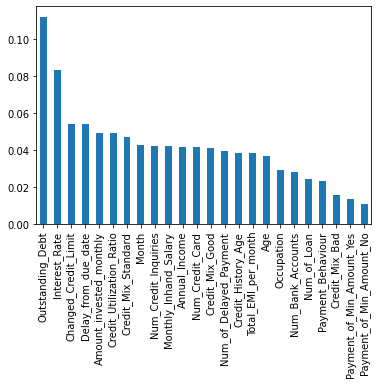

In [116]:
#Important features Classification

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=-1)

# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the classifier
rf_clf.fit(X_train, y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(24).plot(kind='bar')
plt.show()

In [112]:
X_imp=Final_X[['Outstanding_Debt', 'Interest_Rate', 'Changed_Credit_Limit', 'Delay_from_due_date', 'Amount_invested_monthly', 'Credit_Utilization_Ratio']]
y_imp=y

In [113]:
#Spliting Data for important features

X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(X_imp, y_imp, test_size =0.2, random_state=42)

In [114]:
forest_imp = RandomForestClassifier(random_state=1, n_estimators=200, max_depth=30, bootstrap =False)
forest_imp.fit(X_imp_train, y_imp_train)

RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=200,
                       random_state=1)

In [115]:
print(" Imp features Training Score: " , accuracy_score(y_imp_train,forest_imp.predict(X_imp_train)))
print(" Imp Features Test score: ", accuracy_score(y_imp_test, forest_imp.predict(X_imp_test)))

 Imp features Training Score:  1.0
 Imp Features Test score:  0.7418544967641152
